# CE49X Lab 2: Is Wave Energy Worth the Investment?
## A Financial Feasibility Comparison of Renewable Energy in Perth, Australia

**Instructor:** Dr. Eyuphan Koc  
**Department of Civil Engineering, Bogazici University**  
**Semester:** Spring 2026

---

## Background

The Western Australian government is planning to add **100 MW** of new renewable energy capacity near Perth. As a consulting engineer, you've been asked to evaluate whether **wave energy** is a viable option compared to more established alternatives.

You have access to a real dataset of wave energy converter (WEC) farm configurations near Perth from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/882/large-scale+wave+energy+farm). The dataset (`WEC_Perth_49.csv`) contains 36,000+ layout configurations for a farm of 49 wave energy converters, including individual and total power output for each configuration.

Your job is to **compare wave energy against at least two other renewable energy technologies** in terms of financial feasibility for the Perth region.

## Deliverables

Your notebook must include the following:

### 1. Wave Energy Analysis (from the dataset)
- Load and explore the `WEC_Perth_49.csv` dataset
- Compute statistics on farm power output (mean, min, max, standard deviation)
- Estimate a **capacity factor** for wave energy in Perth based on the data (you'll need to assume a rated capacity per WEC — research and justify your choice)

### 2. Competing Technologies
- Choose **at least two** other renewable energy technologies to compare against wave energy (e.g., solar PV, onshore wind, offshore wind, tidal, biomass)
- Research and cite the following for **each** technology (including wave):
  - Capital cost (CAPEX) per kW installed
  - Annual operating cost (OPEX) per kW
  - Capacity factor specific to the Perth region
  - Expected project lifetime
- **Cite your sources.** Use data from reputable organizations (e.g., IRENA, IEA, CSIRO, NREL, Lazard).

### 3. Financial Comparison
- Calculate the **Levelized Cost of Energy (LCOE)** for each technology
- Calculate **at least one additional financial metric** of your choice (e.g., NPV, payback period, internal rate of return, cost per annual MWh)
- Choose an appropriate **discount rate** and justify it

### 4. Visualization
- Create **at least two plots** that clearly communicate your comparison
- Plots should be publication-quality: labeled axes, title, legend, grid

### 5. Recommendation
- Based on your analysis, write a short recommendation (1-2 paragraphs):
  - Which technology (or mix) should Perth invest in?
  - Under what conditions could wave energy become competitive?
  - What factors does your financial model **not** capture?

## Hints

- **LCOE formula:**

$$\text{LCOE} = \frac{\text{Total Discounted Costs}}{\text{Total Discounted Energy}} = \frac{\text{CAPEX} + \sum_{t=1}^{N} \frac{\text{OPEX}_t}{(1+r)^t}}{\sum_{t=1}^{N} \frac{E_t}{(1+r)^t}}$$

  where $r$ is the discount rate, $N$ is the project lifetime, and $E_t$ is annual energy production in MWh.

- **Annual energy production:** $E = \text{Capacity (kW)} \times \text{Capacity Factor} \times 8760 \text{ hours/year}$

- The dataset gives power in **Watts**. Be careful with unit conversions.

- Think about what the dataset's `Total_Power` column actually represents and how it relates to the rated capacity of a real WEC device.

## Grading

| Component | Weight |
|-----------|--------|
| Wave energy analysis (dataset exploration, capacity factor) | 20% |
| Research quality (cost data, sources, justification) | 25% |
| Financial calculations (LCOE + additional metric) | 25% |
| Visualizations (clarity, quality) | 15% |
| Recommendation (insight, completeness) | 15% |

## Submission

1. Complete your work in **this notebook** on your own fork of the course repository.
2. Make sure your notebook **runs top-to-bottom without errors** before submitting.
3. Commit and push your completed notebook to your fork.
4. We will grade directly from your fork — there is no separate upload. Make sure your latest work is pushed before the deadline.

---
## Your Work Starts Here

The average farm output is 3.94 MW. Assuming each WEC has a rated capacity of 1 MW, (Real-world wave energy converters are usually rated between 0.5 MW and 2 MW. Therefore, a value of 1 MW per WEC is assumed in this analysis.) the total rated capacity of the farm is 49 MW. This results in an estimated capacity factor of approximately 8%. This relatively low value suggests that the dataset may represent specific layout conditions rather than annual average sea-state production.

In [ ]:
## 1. Deliverables

## taking the csv file to directory, seeing if the file is in the directory
import os 
os.listdir()

## reading the csv 
import pandas as pd
df = pd.read_csv("WEC_Perth_49.csv")

## showing the first 5 rows 
df.head()

## exploring the dataset
df.shape
df.columns
df.info()

## farm power output 
farm_power_MW = df["Total_Power"] / 1_000_000

mean_power = farm_power_MW.mean()
min_power = farm_power_MW.min()
max_power = farm_power_MW.max()
std_power = farm_power_MW.std()

print(f"Mean Power: {mean_power:.3f} MW")
print(f"Minimum Power: {min_power:.3f} MW")
print(f"Maximum Power: {max_power:.3f} MW")
print(f"Standard Deviation: {std_power:.3f} MW")

## capacity factor
rated_per_wec_MW = 1  # assumption: 1 MW per WEC
farm_rated_MW = 49 * rated_per_wec_MW

capacity_factor_wave = mean_power / farm_rated_MW

print(f"Wave Capacity Factor: {capacity_factor_wave:.3f}")











<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36043 entries, 0 to 36042
Columns: 149 entries, X1 to Total_Power
dtypes: float64(149)
memory usage: 41.0 MB
Mean Power: 3.938 MW
Minimum Power: 3.389 MW
Maximum Power: 4.178 MW
Standard Deviation: 0.123 MW
Wave Capacity Factor: 0.080


Choosing Solar PV and Onshore Wind

Cost data for solar PV and onshore wind were obtained from:
International Renewable Energy Agency (IRENA), Renewable Power Generation Costs in 2024 (2025 edition). https://www.irena.org/-/media/Files/IRENA/Agency/Publication/2025/Jul/IRENA_TEC_RPGC_in_2024_2025.pdf 

Wave Energy Cost Assumptions

Marine and hydrokinetic (MHK) technologies, including wave energy converters, are still early-stage with limited commercial deployment. Because standardised cost tables do not yet exist in major cost reports, capital cost and operating cost assumptions are based on techno-economic literature for marine energy technologies. Typical CAPEX for wave energy is assumed in the range of 4000–8000 USD/kW, with OPEX of 100–200 USD/kW-year, and a project lifetime of 20 years. Capacity factor is taken from the dataset estimate (~8%).

Source: Techno-economic review of marine energy technologies (e.g., **Guo et al., 2023**), Marine and Hydrokinetic Data Repository guidance on cost structures (NREL OpenEI), and related wave energy LCOE literature.



### Cost Assumptions for Compared Technologies

#### Solar PV
- **CAPEX:** 691 USD/kW  
- **OPEX:** 15 USD/kW-year  
- **Capacity Factor (Perth assumption):** 22%  
- **Lifetime:** 25 years  

Capital cost data for utility-scale solar PV are obtained from the International Renewable Energy Agency (IRENA), *Renewable Power Generation Costs in 2024*. Annual operating cost is based on typical fixed O&M ranges reported in renewable energy cost literature.

---

#### Onshore Wind
- **CAPEX:** 1041 USD/kW  
- **OPEX:** 40 USD/kW-year  
- **Capacity Factor (Perth assumption):** 40%  
- **Lifetime:** 25 years  

Capital cost data for onshore wind are obtained from IRENA (2024). Annual operating costs reflect typical fixed O&M values reported in international wind cost assessments.

---

#### Wave Energy
- **CAPEX:** 4000–8000 USD/kW (6000 USD/kW used as midpoint in calculations)  
- **OPEX:** 100–200 USD/kW-year (150 USD/kW-year midpoint used)  
- **Capacity Factor:** ~8% (estimated from dataset analysis)  
- **Lifetime:** 20 years  

Wave energy cost assumptions are based on techno-economic assessments of marine and hydrokinetic technologies reported in international energy literature. Since wave energy is not yet widely commercialized, cost values are presented as ranges.




LCOE Wave  (USD/MWh): 1017.5
LCOE Solar (USD/MWh): 38.6
LCOE Wind  (USD/MWh): 36.9


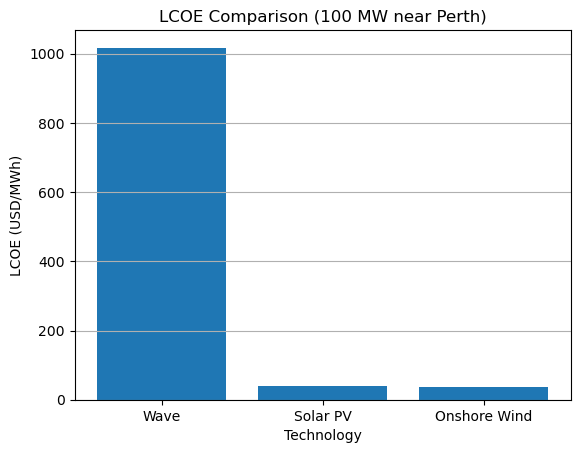

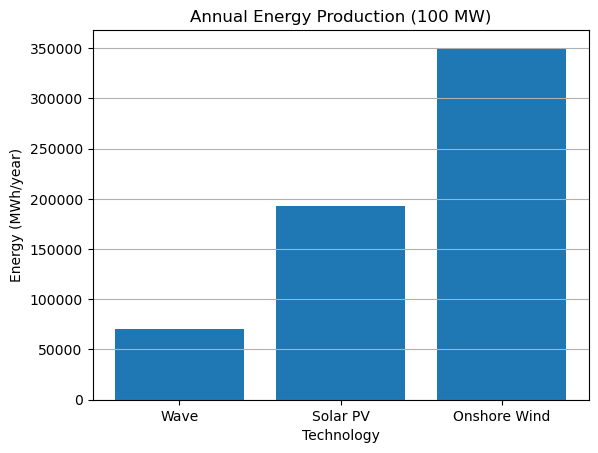

In [13]:
import numpy as np

# Project size (government target)
capacity_MW = 100
capacity_kW = capacity_MW * 1000  # 100 MW = 100,000 kW

# Discount rate (assumption)
r = 0.07  # 7%

# Lifetimes (years)
N_solar = 25
N_wind  = 25
N_wave  = 20

# Capacity factors
cf_wave  = capacity_factor_wave  # from dataset (~0.08)
cf_solar = 0.22
cf_wind  = 0.40

# CAPEX (USD/kW)
capex_solar = 691
capex_wind  = 1041
capex_wave  = 6000   # midpoint of 4000–8000

# OPEX (USD/kW-year)
opex_solar = 15
opex_wind  = 40
opex_wave  = 150     # midpoint of 100–200

def annual_energy_MWh(capacity_kW, capacity_factor):
    return capacity_kW * capacity_factor * 8760 / 1000  # MWh/year

def pv_factor(r, N):
    # sum_{t=1..N} 1/(1+r)^t
    return sum((1/(1+r))**t for t in range(1, N+1))

def lcoe(capacity_kW, cf, capex_per_kW, opex_per_kW_year, r, N):
    capex = capex_per_kW * capacity_kW
    opex_annual = opex_per_kW_year * capacity_kW
    E_annual = annual_energy_MWh(capacity_kW, cf)

    pv_costs = capex + opex_annual * pv_factor(r, N)
    pv_energy = E_annual * pv_factor(r, N)

    return pv_costs / pv_energy  # USD/MWh

lcoe_wave  = lcoe(capacity_kW, cf_wave,  capex_wave,  opex_wave,  r, N_wave)
lcoe_solar = lcoe(capacity_kW, cf_solar, capex_solar, opex_solar, r, N_solar)
lcoe_wind  = lcoe(capacity_kW, cf_wind,  capex_wind,  opex_wind,  r, N_wind)

print("LCOE Wave  (USD/MWh):", round(lcoe_wave, 1))
print("LCOE Solar (USD/MWh):", round(lcoe_solar, 1))
print("LCOE Wind  (USD/MWh):", round(lcoe_wind, 1))

## comparison of the LCOE values
import matplotlib.pyplot as plt

names = ["Wave", "Solar PV", "Onshore Wind"]
values = [lcoe_wave, lcoe_solar, lcoe_wind]

plt.figure()
plt.bar(names, values)
plt.title("LCOE Comparison (100 MW near Perth)")
plt.xlabel("Technology")
plt.ylabel("LCOE (USD/MWh)")
plt.grid(True, axis="y")
plt.show()

## annual energy production
E_wave  = annual_energy_MWh(capacity_kW, cf_wave)
E_solar = annual_energy_MWh(capacity_kW, cf_solar)
E_wind  = annual_energy_MWh(capacity_kW, cf_wind)

plt.figure()
plt.bar(names, [E_wave, E_solar, E_wind])
plt.title("Annual Energy Production (100 MW)")
plt.xlabel("Technology")
plt.ylabel("Energy (MWh/year)")
plt.grid(True, axis="y")
plt.show()


5. Recommendation

Based on the LCOE results, wave energy is not financially competitive for adding 100 MW of new renewable capacity near Perth under the assumptions used in this notebook. The estimated LCOE for wave energy is ~1017.5 USD/MWh, which is far higher than solar PV (~38.6 USD/MWh) and onshore wind (~36.9 USD/MWh). The main drivers are the low wave capacity factor estimated from the dataset (~8%) combined with high CAPEX and OPEX assumptions typical of an emerging marine technology.

Therefore, the most financially feasible option for near-term deployment is to prioritize a mix of solar PV and onshore wind. Wave energy could be considered only as a longer-term option or a small pilot-scale project, especially if future improvements increase capacity factor and significantly reduce CAPEX/OPEX through technology maturity and supply-chain learning.


When could wave energy become competitive?

Wave energy could become more competitive if:
- The effective capacity factor increases significantly (e.g., through better device performance, improved control, better site selection, and/or using sea-state distributions rather than a single operating condition).
- Capital costs fall substantially (e.g., from ~6000 USD/kW toward the low thousands USD/kW) as the technology scales up and becomes commercial.
- Operating/maintenance costs decrease through improved reliability, easier offshore servicing, and better logistics.
- Wave energy provides additional system value (e.g., better complementarity with solar and wind, reduced curtailment, or stronger production during periods when solar output is low).


What this financial model does not capture

This simplified LCOE-based model does not include:
- Grid connection and network upgrade costs (distance to grid, subsea cables, substation upgrades).
- Integration costs and system value (curtailment, storage needs, ancillary services, firming).
- Permitting, environmental monitoring, and marine spatial planning constraints.
- Technology risk and financing effects (higher risk projects often face higher cost of capital).
- Variability of wave conditions across seasons and years (the dataset may not represent a full annual wave climate).


---

### Questions?

**Dr. Eyuphan Koc**  
eyuphan.koc@bogazici.edu.tr